# sklearn v/s sklearnex
## Comparing Stock Scikit-Learn with Intel Extension for Scikit-Learn

In [1]:
#importing the required libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
data = pl.read_csv(r"synthetic_data_10m.csv")

In [3]:
data.head()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Diabetes_binary
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
52,0,20.682901,1,0,0,1,1,0,0,2,12,15,0
93,1,20.784071,1,1,0,1,1,0,1,1,25,24,0
15,1,23.431095,0,0,0,0,0,0,1,5,10,12,1
72,0,38.688462,0,1,0,1,1,0,0,5,26,4,0
61,0,23.393194,0,0,1,0,0,1,0,4,7,11,0


In [4]:
data.tail()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Diabetes_binary
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
65,0,18.334194,0,0,0,1,0,0,0,3,24,19,0
58,1,15.757333,1,0,0,0,0,1,1,2,28,19,1
38,1,39.133497,1,1,1,0,1,1,0,2,15,10,1
36,0,29.876975,0,0,0,0,1,1,0,4,29,3,0
37,0,37.034871,0,0,0,0,1,1,1,5,0,25,1


In [5]:
data.shape

(10000000, 14)

In [6]:
features = data[["Age", "Sex", "BMI", "Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack",
"PhysActivity", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth"]]

In [7]:
features.head()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
52,0,20.682901,1,0,0,1,1,0,0,2,12,15
93,1,20.784071,1,1,0,1,1,0,1,1,25,24
15,1,23.431095,0,0,0,0,0,0,1,5,10,12
72,0,38.688462,0,1,0,1,1,0,0,5,26,4
61,0,23.393194,0,0,1,0,0,1,0,4,7,11


In [8]:
features.tail()

Age,Sex,BMI,Smoker,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth
i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
65,0,18.334194,0,0,0,1,0,0,0,3,24,19
58,1,15.757333,1,0,0,0,0,1,1,2,28,19
38,1,39.133497,1,1,1,0,1,1,0,2,15,10
36,0,29.876975,0,0,0,0,1,1,0,4,29,3
37,0,37.034871,0,0,0,0,1,1,1,5,0,25


In [9]:
features.shape

(10000000, 13)

In [10]:
target = data[["Diabetes_binary"]]

In [11]:
target.head()

Diabetes_binary
i64
0
0
1
0
0


In [12]:
target.tail()

Diabetes_binary
i64
0
1
1
0
1


In [13]:
target.shape

(10000000, 1)

In [14]:
#Creating the features(X) and target(y) variables.
X = features
y = target

In [15]:
#Standard train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
#DTC Model training
%time model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

CPU times: user 22 µs, sys: 7 µs, total: 29 µs
Wall time: 30.5 µs


DecisionTreeClassifier(max_depth=10, random_state=42)

In [17]:
#Model Testing
%time y_pred = model.predict(X_test)
print(y_pred)

CPU times: user 223 ms, sys: 321 ms, total: 544 ms
Wall time: 223 ms
[0 0 0 ... 0 0 0]


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6998785


In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1399661     226]
 [ 600017      96]]


In [20]:
cm = confusion_matrix(y_test, y_pred)
# Extract values
tn, fp, fn, tp = cm.ravel()
# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.9998385583979278


In [21]:
# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.00015996987234070918


In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82   1399887
           1       0.30      0.00      0.00    600113

    accuracy                           0.70   2000000
   macro avg       0.50      0.50      0.41   2000000
weighted avg       0.58      0.70      0.58   2000000



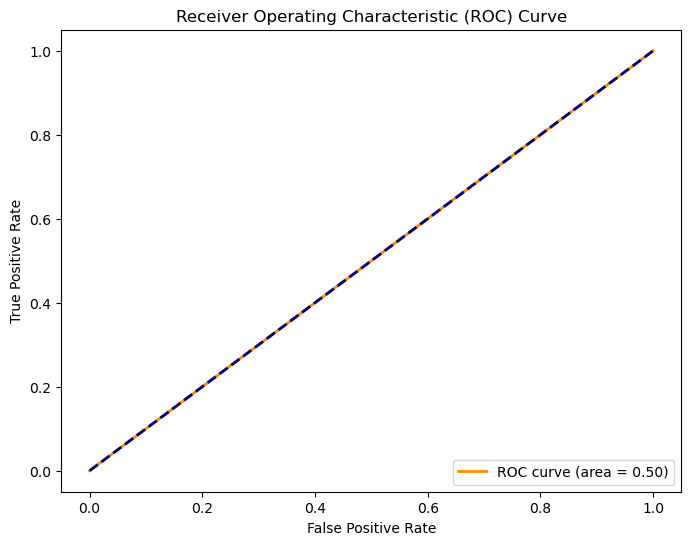

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Terminated